<a href="https://colab.research.google.com/github/DivyanshRana1515/Deep-Learning-Lab-/blob/main/Exp_4_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
# Download dataset
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")
print("Dataset Path:", path)

Using Colab cache for faster access to the 'cards-image-datasetclassification' dataset.
Dataset Path: /kaggle/input/cards-image-datasetclassification


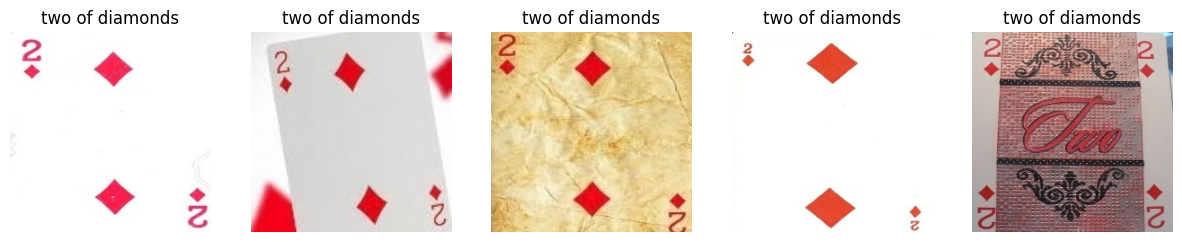

In [3]:
import random

# Choose dataset folder (train set)
train_path = os.path.join(path, "train")

# Pick a random class
random_class = random.choice(os.listdir(train_path))
class_path = os.path.join(train_path, random_class)

# Pick random images from that class
images = random.sample(os.listdir(class_path), 5)

plt.figure(figsize=(15,5))
for i, img_name in enumerate(images):
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(random_class)
    plt.axis("off")
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [5]:
# Dataset paths
train_dir = os.path.join(path, "train")
test_dir  = os.path.join(path, "test")

# Preprocessing with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [6]:
# Load MobileNetV2 without top classifier
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 53)             │        13,621 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,599,541 (9.92 MB)

 Trainable params: 341,557 (1.30 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.1369 - loss: 3.3929 - val_accuracy: 0.3811 - val_loss: 2.1691
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 483s 2s/step - accuracy: 0.3420 - loss: 2.2399 - val_accuracy: 0.3887 - val_loss: 1.9333
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.4073 - loss: 1.9549 - val_accuracy: 0.4642 - val_loss: 1.8003
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.4851 - loss: 1.7184 - val_accuracy: 0.4604 - val_loss: 1.7966
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.4996 - loss: 1.6337 - val_accuracy: 0.4830 - val_loss: 1.6729
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.5191 - loss: 1.5161 - val_accuracy: 0.4792 - val_loss: 1.6133
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.5451 - loss: 1.4606 - val_accuracy: 0.4906 - val_loss: 1.6398
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.5653 - loss: 1.3952 - val_accu

In [9]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5197 - loss: 1.6020
Test Accuracy: 0.52


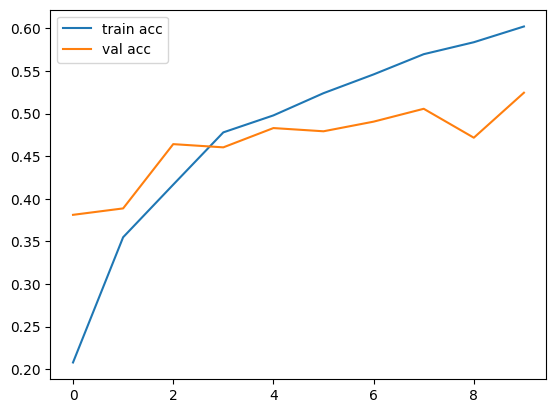

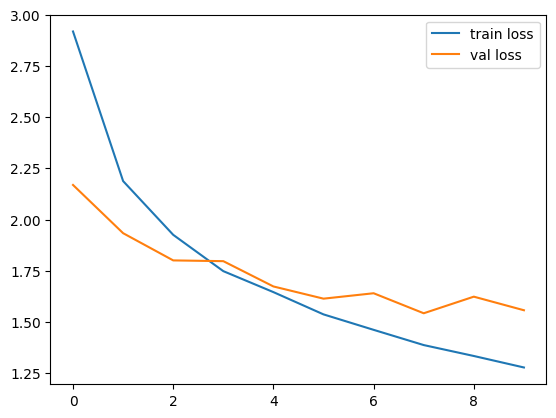

In [10]:
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend()
plt.show()

Saving photo_2025-09-08_00-38-04.jpg to photo_2025-09-08_00-38-04.jpg
Saving photo_2025-09-08_00-37-56.jpg to photo_2025-09-08_00-37-56.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


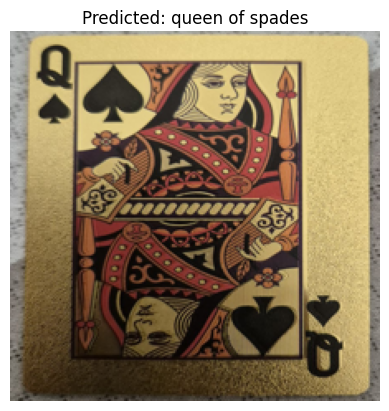

Predicted Class: queen of spades
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


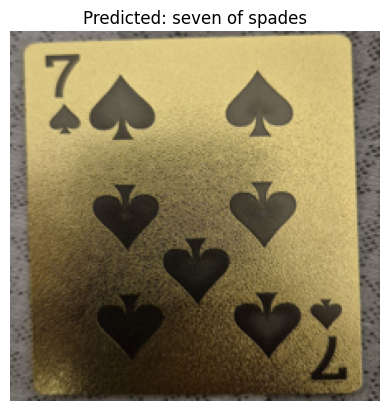

Predicted Class: seven of spades


In [18]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# ✅ Load the trained model
# Skip this if your model is still in memory
model = load_model("card_classifier.h5")

# ✅ Get class labels from training generator
class_labels = list(train_generator.class_indices.keys())

# ✅ Function to load, preprocess, and predict a custom image
def predict_custom_image(img_path):
    # Load and preprocess image
    img = Image.open(img_path).convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    # Show image with prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

    print("Predicted Class:", predicted_class)

# ✅ Upload image in Colab
uploaded = files.upload()

for filename in uploaded.keys():
    predict_custom_image(filename)
